# Surf or Ultimate ? Which Megaline plan is better ?


In this analytical data project for telecom operator Megaline, we will determinie which prepaid plans, Surf and Ultimate, brings in more revenue in order to determeine their budget for their advertising team.

We will analyze the clients' behavior by using data from 500 Megaline customers. The data includes which plan the clients use, where they are from, who the clients are, the number of calls made, and the text messages sent from 2018. Based on this data, we will then conclude which prepaid plan brings in more revenue.

The steps we need to take to make our revenue conclusion are the following:

1. Download all the datasets

2. Prepare the data by eliminating errors and formatting correctly for data preperation

3. Statistical data analysis

4. Test our hypotheses

5. Conclusion


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In this prepartion of the data, I noticed that one column in the `users` dataset was called `churn_date`. `churn_date` contains data values that shows the date of when a client's plan was terminated. So I decided to rename it to `end_date` so that I had a better understanding of what its data values were for.

I also noticed that the `date` columns for each dataframe were of `object` data types. So I converted each data columns with date values into `datetime` types.

In [3]:
display(calls_df)
calls_df.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [5]:
display(internet_df)
internet_df.info()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
display(messages_df)
messages_df.info()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
display(users_df)
users_df.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users_df = users_df.rename(columns={'churn_date':'end_date'})
display(users_df)

,user_id,first_name,last_name,age,city,reg_date,plan,end_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [11]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['end_date'] = pd.to_datetime(users_df['end_date'])
users_df[['first_name','last_name','city','plan']] = users_df[['first_name','last_name','city','plan']].astype(str)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   end_date    34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Plans

In [12]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# Print a sample of data for plans
plans_df.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
# Checking for duplicates
plans_df.duplicated()

0    False
1    False
dtype: bool

In [15]:
# Checking for missing values
plans_df.isnull().value_counts()

messages_included  mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  plan_name
False              False                  False             False            False       False            False           False        2
dtype: int64

From an intial look at the `plans` dataframe, it is clear that the `monthly pay` is more expensive for the Ultimate plan than the Surf plan and the client receives a better price rate in the Ultimate plan for each message sent and minute used. The client also receives more messages, MBs per month, and minutes included initial on the Ultimate plan. 

At this moment, there doesn't seem to be anything wrong with this dataframe.

## Users

In [18]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   end_date    34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [19]:
# Print a sample of data for users
users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,end_date
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaT
280,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaT
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaT
456,1456,Seymour,Olsen,66,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-02,ultimate,NaT
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaT


In [20]:
# Check for duplicates
users_df.duplicated().value_counts()

False    500
dtype: int64

In [21]:
# Check for missing values
users_df.isnull().value_counts()

user_id  first_name  last_name  age    city   reg_date  plan   end_date
False    False       False      False  False  False     False  True        466
                                                               False        34
dtype: int64

After taking a look at the `users` dataframe, I noticed that in the `city` column, the country is listed as MSA. This should probably be fixed to say USA instead. 

We also have two columns: `reg_date` and `churn_date` with date data but have the type of `object`. We can enrich our data by transforming both columns into `datetime types`. 

Lastly, we can change `churn_date` into `end_date`.I am not exactly sure what churn means from an intial read of the dataframe, but it's values represent the date that a client's plan has ended.

One observaiton made from the `info()` call on the dataframe shows that there were 34 clients who canceled their plans. I double checked this by calling the `isnull()` and `value_counts()` methods.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [22]:
# Renaming churn_date to end_date
users_df = users_df.rename(columns={'churn_date':'end_date'})

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
# Changing the date columns' types to datetime types
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['end_date'] = pd.to_datetime(users_df['end_date'])

## Calls

In [24]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [25]:
# Print a sample of data for calls
calls_df.sample(5)

,id,user_id,call_date,duration
554,1004_15,1004,2018-08-04,4.79
113338,1398_150,1398,2018-12-14,13.90
51919,1187_112,1187,2018-07-05,14.42
114208,1400_558,1400,2018-06-24,0.00
23247,1085_39,1085,2018-12-21,7.18


In [26]:
# Check for duplicates
calls_df.duplicated().value_counts()

False    137735
dtype: int64

In [27]:
# Check for missing values
calls_df.isnull().value_counts()

id     user_id  call_date  duration
False  False    False      False       137735
dtype: int64

After taking a look at the `calls` dataframe, I think it would be useful to give the duration a unit of measurement in the column name to help with understanding how long the calls were exactly. We can enrich this data by adding mins into the column name. 

We can also enrich the data by transforming the `call_date` column type from `object` to `datetime`. 


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [28]:
# No fixes necessary

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [29]:
# Changing call_date column's type to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [30]:
# Change column duration name to duration(min)
calls_df = calls_df.rename(columns={'duration':'duration(min)'})
calls_df['duration(min)'] = np.ceil(calls_df['duration(min)'])
calls_df.info()
display(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration(min)  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration(min)
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


## Messages

In [31]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [32]:
# Print a sample of data for messages
messages_df.sample(5)

,id,user_id,message_date
10320,1076_731,1076,2018-08-01
8682,1064_86,1064,2018-12-12
55076,1347_113,1347,2018-09-06
76046,1497_526,1497,2018-12-24
65982,1431_21,1431,2018-11-10


In [33]:
# Check for duplicates
messages_df.duplicated().value_counts()

False    76051
dtype: int64

In [34]:
# Check for missing values
messages_df.isnull().value_counts()

id     user_id  message_date
False  False    False           76051
dtype: int64

The `messages` dataframe looks to have no duplicates nor missing values. I believe we can enrich this data by changing the `message_date` column's data type to `datetime`.

In [35]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [36]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [37]:
# Print a sample of data for the internet traffic
internet_df.sample(5)


,id,user_id,session_date,mb_used
49668,1222_167,1222,2018-07-04,492.49
20724,1095_427,1095,2018-10-13,13.89
101605,1486_295,1486,2018-12-28,125.18
79363,1370_2,1370,2018-11-02,491.22
75766,1356_214,1356,2018-09-19,66.27


In [38]:
# Check for duplicates
internet_df.duplicated().value_counts()

False    104825
dtype: int64

In [39]:
# Check for missing values
internet_df.isnull().value_counts()

id     user_id  session_date  mb_used
False  False    False         False      104825
dtype: int64

The `itnernet` dataframe has no duplicates nor missing values. Just as we did with the other dataframes' columns with dates as data values, we will transform the `session_date` column into `datetime` type

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [40]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Study plan conditions

Note: 
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf

Monthly charge: 20, which includes:
500 monthly minutes, 50 texts, and 15 GB of data.
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: 10

Ultimate

Monthly charge: 70, which includes:
3000 monthly minutes, 1000 text messages, and 30 GB of data.
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: 7

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [41]:
# Calculate the number of calls made by each user per month. Save the result.
calls_df['month'] = calls_df['call_date'].dt.month
calls_df['year'] = calls_df['call_date'].dt.year
tot_calls_mon = calls_df.groupby(['user_id', 'month','year']).agg(total_calls=('id', 'count')).reset_index()
tot_calls_mon.iloc()[:10]

,user_id,month,year,total_calls
0,1000,12,2018,16
1,1001,8,2018,27
2,1001,9,2018,49
3,1001,10,2018,65
4,1001,11,2018,64
5,1001,12,2018,56
6,1002,10,2018,11
7,1002,11,2018,55
8,1002,12,2018,47
9,1003,12,2018,149


In [42]:
# Calculate the amount of minutes spent by each user per month. Save the result.
tot_min_mon = calls_df.groupby(['user_id','month','year']).agg(total_min=('duration(min)','sum')).sort_index()
tot_min_mon.iloc()[:10]

total_min
user_id month year           
1000    12    2018      124.0
1001    8     2018      182.0
        9     2018      315.0
        10    2018      393.0
        11    2018      426.0
        12    2018      412.0
1002    10    2018       59.0
        11    2018      386.0
        12    2018      384.0
1003    12    2018     1104.0

In [43]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['month'] = messages_df['message_date'].dt.month
messages_df['year'] = messages_df['message_date'].dt.year
tot_messages_mon  = messages_df.groupby(['user_id','month','year']).agg(total_messages=('id','count')).sort_index()
tot_messages_mon.iloc()[:10]

total_messages
user_id month year                
1000    12    2018              11
1001    8     2018              30
        9     2018              44
        10    2018              53
        11    2018              36
        12    2018              44
1002    10    2018              15
        11    2018              32
        12    2018              41
1003    12    2018              50

In [44]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['year'] = internet_df['session_date'].dt.year
tot_mbs_mon = internet_df.groupby(['user_id','month','year']).agg(total_mbs=('mb_used','sum')).sort_index()
tot_mbs_mon.iloc()[:10]


total_mbs
user_id month year           
1000    12    2018    1901.47
1001    8     2018    6919.15
        9     2018   13314.82
        10    2018   22330.49
        11    2018   18504.30
        12    2018   19369.18
1002    10    2018    6552.01
        11    2018   19345.08
        12    2018   14396.24
1003    12    2018   27044.14

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [45]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merge_calls_messages = pd.merge(tot_calls_mon, tot_messages_mon, 
                                on=['user_id','month','year'],
                               how='outer')
merge_call_mess_int = pd.merge(merge_calls_messages, tot_mbs_mon,
                              on=['user_id','month','year'],
                              how='outer')
merge_final = pd.merge(merge_call_mess_int, tot_min_mon, 
                                   on=['user_id','month','year'],
                                  how='outer')
merge_final.fillna(0, inplace=True)
merge_final.sample(5)


,user_id,month,year,total_calls,total_messages,total_mbs,total_min
2138,1471,11,2018,6.0,18.0,4882.48,31.0
1064,1232,4,2018,62.0,0.0,9727.59,377.0
1925,1417,12,2018,94.0,10.0,21970.57,627.0
34,1009,10,2018,114.0,0.0,22664.84,740.0
329,1071,9,2018,59.0,0.0,11812.60,457.0


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Indeed `how=outer` is a correct way of keeping all data. 

In [46]:
# Add the plan information
merge_final['user_id'] = merge_final['user_id'].astype(int)
users_df['user_id'] = users_df['user_id'].astype(int)
merge_final_plan = pd.merge(merge_final, users_df[['user_id','plan']],
                                    on='user_id', how='left')

# Missing Plans Check
missing_plans = merge_final_plan[merge_final_plan['plan'].isnull()]
print(f"Missing Plan Information: {missing_plans.shape[0]} users")
display(merge_final_plan.query("month == 1"))

Missing Plan Information: 0 users


,user_id,month,year,total_calls,total_messages,total_mbs,total_min,plan
155,1042,1,2018,18.0,0.0,1854.93,114.0,surf
360,1077,1,2018,42.0,37.0,10635.64,290.0,ultimate
861,1185,1,2018,23.0,0.0,6812.77,181.0,ultimate
913,1196,1,2018,42.0,23.0,8908.61,287.0,ultimate
991,1214,1,2018,5.0,2.0,1315.35,16.0,ultimate
1642,1362,1,2018,42.0,21.0,7894.79,292.0,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [47]:
plans_df.set_index('plan_name', inplace=True)

In [48]:
def calculate_revenue(row):
    # Access plan details using the plan name from the row
    plan = row['plan']
    
    # Retrieve plan specifics
    plan_details = plans_df.loc[plan]
    minutes_included = plan_details['minutes_included']
    usd_per_minute = plan_details['usd_per_minute']
    messages_included = plan_details['messages_included']
    usd_per_message = plan_details['usd_per_message']
    internet_included = plan_details['mb_per_month_included']
    usd_per_gb = plan_details['usd_per_gb']
    monthly_fee = plan_details['usd_monthly_pay']
    
    # Start with monthly fee
    revenue = monthly_fee
    
    # Check and add charges for minutes if exceeded
    if row['total_min'] > minutes_included:
        revenue += (row['total_min'] - minutes_included) * usd_per_minute

    # Check and add charges for messages if exceeded
    if row['total_messages'] > messages_included:
        revenue += (row['total_messages'] - messages_included) * usd_per_message

    # Check and add charges for internet if exceeded (converting MB to GB for the bill)
    if row["total_mbs"] > internet_included:
        extra_gb_used = np.ceil((row["total_mbs"] - internet_included) / 1024)
        revenue += extra_gb_used * usd_per_gb

    return revenue
# Assuming you adjust the function call accordingly:
merge_final_plan['monthly_revenue'] = merge_final_plan.apply(calculate_revenue, axis=1)

display(merge_final_plan)

,user_id,month,year,total_calls,total_messages,total_mbs,total_min,plan,monthly_revenue
0,1000,12,2018,16.0,11.0,1901.47,124.0,ultimate,70.00
1,1001,8,2018,27.0,30.0,6919.15,182.0,surf,20.00
2,1001,9,2018,49.0,44.0,13314.82,315.0,surf,20.00
3,1001,10,2018,65.0,53.0,22330.49,393.0,surf,90.09
4,1001,11,2018,64.0,36.0,18504.30,426.0,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,2018,0.0,61.0,13039.91,0.0,surf,20.33
2289,1361,5,2018,0.0,2.0,1519.69,0.0,surf,20.00
2290,1482,10,2018,0.0,2.0,0.00,0.0,ultimate,70.00
2291,1108,12,2018,0.0,0.0,233.17,0.0,ultimate,70.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:xlabel='month,plan'>

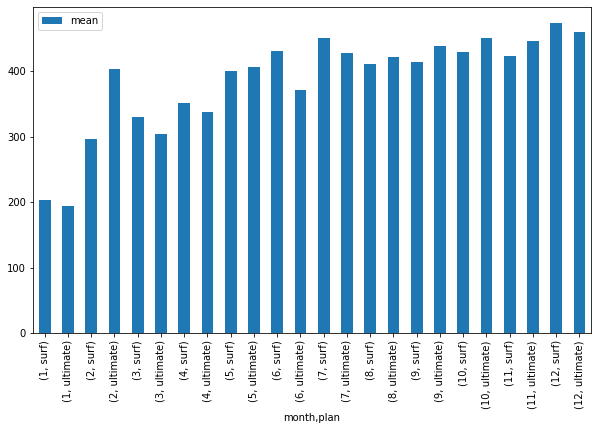

In [49]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
mean_duration_per_plan_per_month = merge_final_plan.groupby(['month', 'plan'])['total_min'].agg(['mean'])

mean_duration_per_plan_per_month.plot(kind='bar', figsize=(10,6))

<AxesSubplot:ylabel='Frequency'>

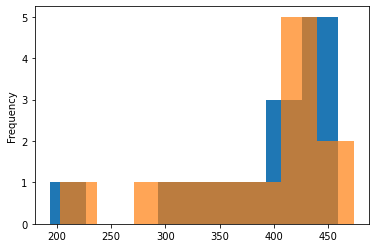

In [50]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
mean_mins_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_min'].mean().reset_index(name='total_mins_mon')
mean_mins_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_min'].mean().reset_index(name='total_mins_mon')


mean_mins_ultimate['total_mins_mon'].plot(kind='hist', bins=8)
mean_mins_surf['total_mins_mon'].plot(kind='hist', bins=8, alpha=.7)




[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [51]:
# Calculate the mean and the variance of the monthly call duration
mean_call_duration = merge_final_plan.groupby(['month','plan'])['total_min'].mean().reset_index(name='total_mins_mon_mean')
var_call_duration = merge_final_plan.groupby(['month','plan'])['total_min'].var().reset_index(name='total_mins_mon_var')
print(mean_call_duration.iloc()[:26])
var_call_duration.iloc()[:26]

    month      plan  total_mins_mon_mean
0       1      surf           203.000000
1       1  ultimate           193.500000
2       2      surf           297.000000
3       2  ultimate           403.142857
4       3      surf           330.000000
5       3  ultimate           304.250000
6       4      surf           351.540000
7       4  ultimate           336.857143
8       5      surf           399.584416
9       5  ultimate           406.241379
10      6      surf           431.298969
11      6  ultimate           370.957447
12      7      surf           449.983471
13      7  ultimate           427.067797
14      8      surf           410.111111
15      8  ultimate           421.436620
16      9      surf           414.226804
17      9  ultimate           437.511628
18     10      surf           429.729958
19     10  ultimate           450.735849
20     11      surf           423.325088
21     11  ultimate           445.196850
22     12      surf           473.836478
23     12  ultim

,month,plan,total_mins_mon_var
0,1,surf,15842.000000
1,1,ultimate,16572.333333
2,2,surf,52226.500000
3,2,ultimate,76889.476190
4,3,surf,35809.363636
5,3,ultimate,61984.931818
6,4,surf,50866.743265
7,4,ultimate,34888.928571
8,5,surf,59754.219754
9,5,ultimate,43841.046798


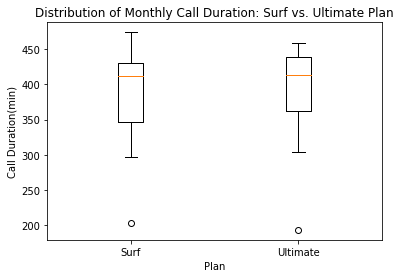

In [52]:
# Plot a boxplot to visualize the distribution of the monthly call duration
mean_mins_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_min'].mean()
mean_mins_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_min'].mean()
plt.boxplot([mean_mins_surf,mean_mins_ultimate], labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Call Duration(min)')
plt.title('Distribution of Monthly Call Duration: Surf vs. Ultimate Plan')
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

<AxesSubplot:ylabel='Frequency'>

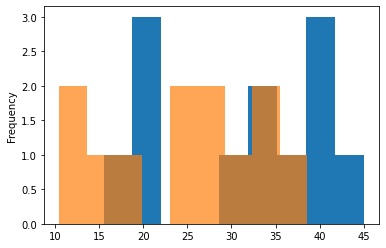

In [53]:
# Compare the number of messages users of each plan tend to send each month
mean_messages_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_messages'].mean().reset_index(name='total_messages_mon')
mean_messages_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_messages'].mean().reset_index(name='total_messages_mon')

mean_messages_surf.iloc()[:26]
mean_messages_ultimate.iloc()[:26]

mean_messages_ultimate['total_messages_mon'].plot(kind='hist', bins=9)
mean_messages_surf['total_messages_mon'].plot(kind='hist', bins=9, alpha=.7)


In [54]:
# Calculate the mean and the variance of the monthly total messages 
mean_messages_mon = merge_final_plan.groupby(['month','plan'])['total_messages'].mean().reset_index(name='total_messages_mon')
var_messages_mon = merge_final_plan.groupby(['month','plan'])['total_messages'].var().reset_index(name='total_messages_var')
display(mean_messages_mon)
display(var_messages_mon)

,month,plan,total_messages_mon
0,1,surf,10.500000
1,1,ultimate,15.500000
2,2,surf,12.000000
3,2,ultimate,21.571429
4,3,surf,15.260870
5,3,ultimate,20.250000
6,4,surf,17.400000
7,4,ultimate,22.047619
8,5,surf,24.012987
9,5,ultimate,32.103448


,month,plan,total_messages_var
0,1,surf,220.500000
1,1,ultimate,313.666667
2,2,surf,386.000000
3,2,ultimate,478.285714
4,3,surf,346.565217
5,3,ultimate,654.386364
6,4,surf,501.591837
7,4,ultimate,544.147619
8,5,surf,847.197198
9,5,ultimate,1297.310345


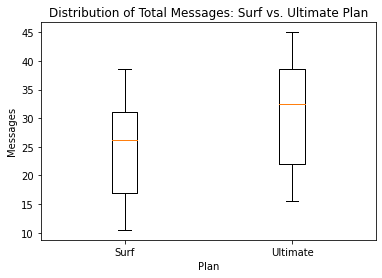

In [55]:
# Plot a boxplot to visualize the distribution of the total monthly messages
mean_messages_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_messages'].mean()
mean_messages_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_messages'].mean()
plt.boxplot([mean_messages_surf,mean_messages_ultimate], labels=['Surf','Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Messages')
plt.title('Distribution of Total Messages: Surf vs. Ultimate Plan')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

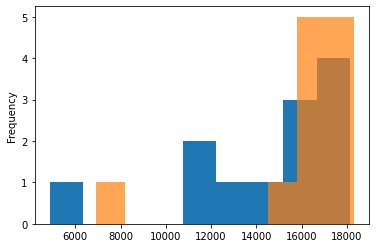

In [56]:
# Compare the amount of internet traffic consumed by users per plan
mean_data_consumed_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_mbs'].mean().reset_index(name='total_mbs_mon')
mean_data_consumed_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_mbs'].mean().reset_index(name='total_mbs_mon')

mean_data_consumed_surf['total_mbs_mon'].plot(kind='hist', bins=9)
mean_data_consumed_ultimate['total_mbs_mon'].plot(kind='hist', bins=9, alpha=.7)
plt.show()

In [57]:
# Calculate the mean and the variance of the monthly total messages 
mean_data_consumed = merge_final_plan.groupby(['month','plan'])['total_mbs'].mean().reset_index(name='total_mbs_mean')
var_data_consumed = merge_final_plan.groupby(['month','plan'])['total_mbs'].mean().reset_index(name='total_mbs_var')

display(mean_data_consumed)
display(var_data_consumed)

,month,plan,total_mbs_mean
0,1,surf,4874.860000
1,1,ultimate,6918.092500
2,2,surf,12178.843333
3,2,ultimate,17128.808571
4,3,surf,13345.440000
5,3,ultimate,18321.518333
6,4,surf,11984.203000
7,4,ultimate,16121.654762
8,5,surf,13936.354935
9,5,ultimate,16624.482414


,month,plan,total_mbs_var
0,1,surf,4874.860000
1,1,ultimate,6918.092500
2,2,surf,12178.843333
3,2,ultimate,17128.808571
4,3,surf,13345.440000
5,3,ultimate,18321.518333
6,4,surf,11984.203000
7,4,ultimate,16121.654762
8,5,surf,13936.354935
9,5,ultimate,16624.482414


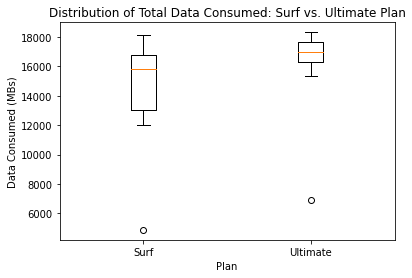

In [58]:
# Plot a boxplot to visualize the distribution of the total internet usuage

mean_data_consumed_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['total_mbs'].mean()
mean_data_consumed_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['total_mbs'].mean()

plt.boxplot([mean_data_consumed_surf, mean_data_consumed_ultimate], labels=['Surf','Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Data Consumed (MBs)')
plt.title('Distribution of Total Data Consumed: Surf vs. Ultimate Plan')
plt.show()

From our boxplot, we can see that client's who choose the Ultimate plan tend to use their internet data slightly more than the Surf clients. The Surf clients however, seem to have a wider range of how much data them consume on a monthly basis. The max amount of data used in the two ranges seem to be similar between the two plans, the minimum amount of data use seems to be different though. This could be due to the constraints of each plan's internet limits. The median value from the Surf and Ultimate plan for data consumed does seem to suggest that clients tend to consume around the same amount of data on both plans.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

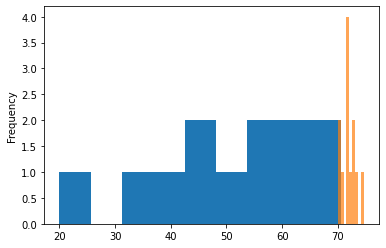

In [59]:
# Compare the amount of monthly revenue per plan
monthly_revenue_mean_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['monthly_revenue'].mean().reset_index(name='monthly_revenue_surf_mean')
monthly_revenue_mean_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month', 'plan'])['monthly_revenue'].mean().reset_index(name='monthly_revenue_ultimate_mean')

monthly_revenue_mean_surf['monthly_revenue_surf_mean'].plot(kind='hist', bins=9)
monthly_revenue_mean_ultimate['monthly_revenue_ultimate_mean'].plot(kind='hist', bins=9, alpha=.7)
plt.show()

In [64]:
# Calculate the mean and the variance of the monthly revenue
monthly_revenue_mean = merge_final_plan.groupby(['month','plan'])['monthly_revenue'].mean().reset_index(name='monthly_revenue_mean')
monthly_revenue_var = merge_final_plan.groupby(['month','plan'])['monthly_revenue'].var().reset_index(name='monthly_revenue_var')

display(monthly_revenue_mean)
display(monthly_revenue_var)

,month,plan,monthly_revenue_mean
0,1,surf,20.000000
1,1,ultimate,70.000000
2,2,surf,34.396667
3,2,ultimate,70.000000
4,3,surf,45.941304
5,3,ultimate,74.666667
6,4,surf,40.710600
7,4,ultimate,73.000000
8,5,surf,47.628182
9,5,ultimate,70.724138


,month,plan,monthly_revenue_var
0,1,surf,0.000000
1,1,ultimate,0.000000
2,2,surf,428.276100
3,2,ultimate,0.000000
4,3,surf,1512.023512
5,3,ultimate,145.515152
6,4,surf,1198.958402
7,4,ultimate,120.400000
8,5,surf,1967.540055
9,5,ultimate,15.206897


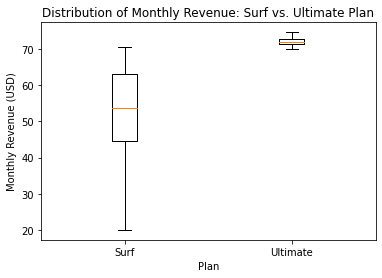

In [61]:
# Plot a boxplot to visualize the distribution of the total internet usuage
mean_monthly_revenue_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['monthly_revenue'].mean()
mean_monthly_revenue_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['monthly_revenue'].mean()

plt.boxplot([mean_monthly_revenue_surf, mean_monthly_revenue_ultimate], labels=['Surf','Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue (USD)')
plt.title('Distribution of Monthly Revenue: Surf vs. Ultimate Plan')
plt.show()

From our boxplots, we can see that the Ultimate plan's median value for monthly revenue has a higher value than the median monthly revenue from the client's who chose the Surf plan. Upon a first glance, this seems reasonable though because of the higher cost for the Ultimate plan. The q1 and q3 values for the Ultimate plan seems to be much closer than that of the Surf plan's however. This may seem to suggest that the Surf plan's clients may tend to go over their monthly limits (mins, messages, data) more often than the Ultimate plan clients. 

## Test statistical hypotheses

Null Hypothesis: There is no difference in the average revenue generated by users of the Ultimate and Surf plans. 

ALternative Hypothesis: There is a difference in the average revenue generated by users of the Ultimate and Surf plans

In [62]:
# Test the hypotheses: the average revenue from users of the Ultimate and Surf calling plans differs
mean_monthly_revenue_surf = merge_final_plan.query("plan == 'surf'").groupby(['month','plan'])['monthly_revenue'].mean()
mean_monthly_revenue_ultimate = merge_final_plan.query("plan == 'ultimate'").groupby(['month','plan'])['monthly_revenue'].mean()

alpha = .05

results = st.stats.ttest_ind(mean_monthly_revenue_surf, mean_monthly_revenue_ultimate, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0004970238953490146
We reject the null hypothesis


/tmp/ipykernel_80/3794786445.py:7: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(mean_monthly_revenue_surf, mean_monthly_revenue_ultimate, equal_var=False)


Null hypothesis: There is no difference in average revenue in NY-NJ area compared to other regions

Alternative hypothesis: There is a difference in average revenue in NY-NJ area compared to other regions

In [63]:
# Test the hypotheses : Average revenue from users in NY-NJ area is different from that of the users 
# from other regions

merge_final_plan_city = pd.merge(merge_final_plan, 
                                  users_df[['user_id', 'city']],
                                  on='user_id', 
                                  how='left')
   
ny_nj_revenue = merge_final_plan_city[merge_final_plan_city['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenue = merge_final_plan_city[~merge_final_plan_city['city'].str.contains('NY-NJ')]['monthly_revenue']

results = st.stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


p-value: 0.03352561588530014
Reject the null hypothesis


/tmp/ipykernel_80/1800065034.py:12: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)


## General conclusion

Distinct Usage Patterns and Revenue across Plans:
Analysis revealed statistically significant differences in average revenue between the "Ultimate" and “Surf” plans. This indicates that the choice of plan materially impacts user behavior in terms of usage and, consequently, the revenue generated for the telecom provider.

Assumption: We assumed that the difference in plan features directly affected user choice and usage behavior. Our analysis did not account for external factors such as user demographics or regional network quality, which could also influence usage patterns.

Geographical Influence on Revenue:
By comparing users in the NY-NJ area to those in other regions, the test aimed to identify if the geographical location influenced revenue generation. While specific outcomes depended on the analysis results, the attempt to segment revenue based on location underscores an assumption that regional market dynamics might affect usage and revenue.

Assumption: The geographic segmentation presumed that the only significant regional difference was location itself, rather than associated factors like regional marketing efforts or local competition.

Methodological Decisions:

The decision to use a two-sample t-test (specifically, Welch’s t-test for cases of unequal variance) was driven by an intention to compare means between two independent groups. This choice hinged on assumptions of normal distribution patterns of revenue within groups and the adequacy of sample sizes.
Setting an alpha value of 0.05 was a balance between avoiding Type I errors (falsely detecting an effect) and Type II errors (failing to detect a real effect), considered standard practice in many analyses.

Data Quality and Integration:

Successful merging of user data with usage logs required a clean, shared identifier (user_id). 

Assumption: There was an underlying assumption that the recorded user_id matches across different datasets were accurate and that there was a 1:1 relationship where necessary for merging.

Implications for Telecom Provider:

The differences in revenue across plans and potential geographical variations offer actionable insights for targeted marketing, plan optimization, and regional strategy development. Identifying high-revenue user segments enables more efficient allocation of marketing resources.

Decision: The analysis implicitly suggested focusing on segments with higher average revenue or usage could maximize ROI for the telecom provider.

Future Analysis Recommendations:

Further investigation into the causes behind the differences in usage and revenue generation, including demographic analysis, user satisfaction surveys, and more detailed regional market analysis, could provide deeper insights.
Exploration of seasonal trends, promotional impacts, and longitudinal studies on user behavior change over time with plan upgrades or downgrades could enrich understanding.

These conclusions and the processes leading up to them highlight the importance of data-driven decision-making in strategic business planning, while also underscoring the relevance of critical assumptions in shaping analysis outcomes.